In [168]:
#Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [169]:
# Importing all datasets
country_data = pd.read_csv("Country-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [170]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [171]:
country_data.shape

(167, 10)

In [172]:
#to rule out the strings for corr matrix; its evident from the data we have one str col; but if data is big this will be handy:)
string_col_list=[]
for column_name, column_value in country_data.iteritems():
    if type(column_value[0])==str:
        string_col_list.append(column_name)
string_col_list

['country']

In [173]:
numbers_col_list = country_data.columns.difference(strings_list)  
rest_numbers_list= country_data[numbers_col_list]
numbers_col_list

Index(['child_mort', 'exports', 'gdpp', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer'],
      dtype='object')

In [174]:
rest_numbers_list.head()

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
0,90.2,10.0,553,7.58,44.9,1610,9.44,56.2,5.82
1,16.6,28.0,4090,6.55,48.6,9930,4.49,76.3,1.65
2,27.3,38.4,4460,4.17,31.4,12900,16.10,76.5,2.89
3,119.0,62.3,3530,2.85,42.9,5900,22.40,60.1,6.16
4,10.3,45.5,12200,6.03,58.9,19100,1.44,76.8,2.13


#### finding correlation among fields for checking and rooting out multi colnearity

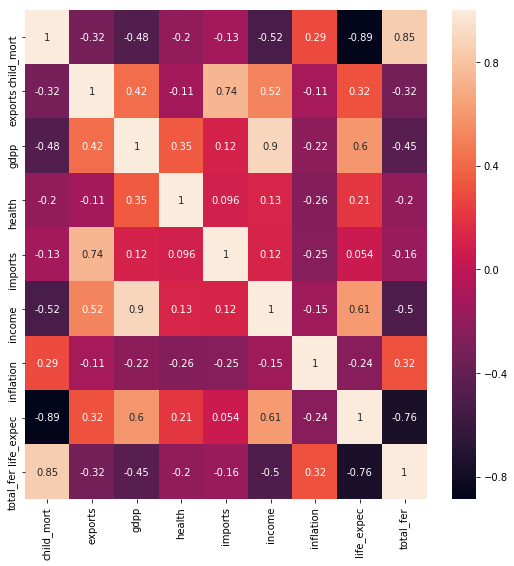

In [175]:
plt.figure(figsize = (9,9))
sns.heatmap(rest_numbers_list.corr(),vmax=1,annot = True)

#### normalizing dataset

In [176]:
#normalizing below the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rest_numbers_list_fit = scaler.fit_transform(rest_numbers_list)

In [177]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [178]:
#Performing here the PCA on the train data
pca.fit(rest_numbers_list_fit)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [179]:
pca.components_

array([[-0.41951945,  0.28389698,  0.39264482,  0.15083782,  0.16148244,
         0.39844111, -0.19317293,  0.42583938, -0.40372896],
       [ 0.19288394,  0.61316349, -0.0460224 , -0.24308678,  0.67182064,
         0.02253553, -0.00840447, -0.22270674,  0.15523311],
       [-0.02954353,  0.14476069,  0.12297749, -0.59663237, -0.29992674,
         0.3015475 ,  0.64251951,  0.11391854,  0.01954925],
       [ 0.37065326,  0.00309102,  0.53199457,  0.4618975 , -0.07190746,
         0.39215904,  0.15044176, -0.20379723,  0.37830365],
       [-0.16896968,  0.05761584, -0.18016662,  0.51800037,  0.25537642,
        -0.2471496 ,  0.7148691 ,  0.1082198 , -0.13526221],
       [ 0.20062815, -0.05933283,  0.01677876,  0.00727646, -0.03003154,
         0.16034699,  0.06628537, -0.60112652, -0.75068875],
       [-0.07948854, -0.70730269,  0.24299776, -0.24983051,  0.59218953,
         0.09556237,  0.10463252,  0.01848639,  0.02882643],
       [-0.68274306, -0.01419742, -0.24969636,  0.07249683, -0

In [180]:
column_names = list(rest_numbers_list.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3], 'Feature':column_names})
df_pca.head()

,PC1,PC2,PC3,PC4,Feature
0,-0.419519,0.192884,-0.029544,0.370653,child_mort
1,0.283897,0.613163,0.144761,0.003091,exports
2,0.392645,-0.046022,0.122977,0.531995,gdpp
3,0.150838,-0.243087,-0.596632,0.461897,health
4,0.161482,0.671821,-0.299927,-0.071907,imports


In [181]:
country = pd.concat([country_data], axis=1)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


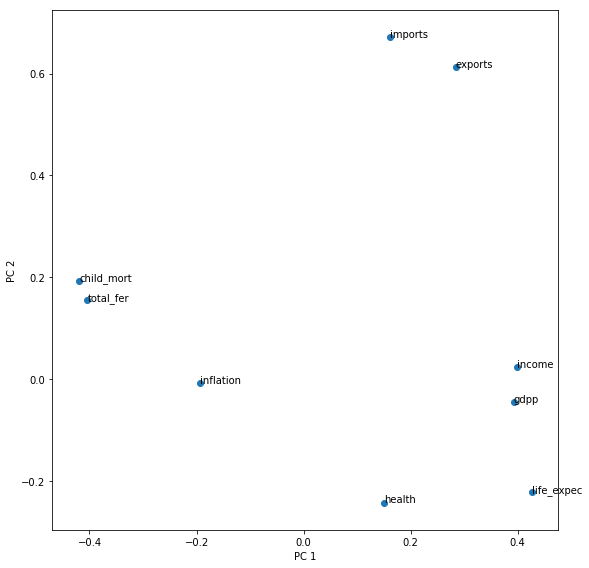

In [255]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pca.PC1, df_pca.PC2)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
for i, txt in enumerate(df_pca.Feature):
    plt.annotate(txt, (df_pca.PC1[i],df_pca.PC2[i]))
plt.tight_layout()
plt.show()

In [183]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

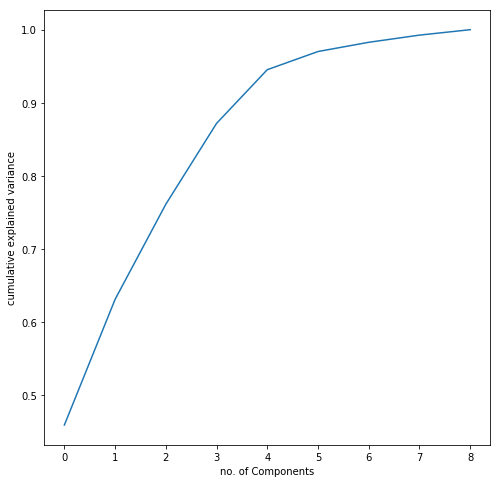

In [256]:
#Making the screeplot - plotting of the cumulative variance against the no. of components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no. of Components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 4 components are enough to describe above 90% of the variance in the dataset
 We'll choose 4 components for our modeling

In [185]:
#Using incremental PCA for efficiency - as we all know this saves a lot of time on larger datasets(in general)
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)


In [186]:
df_train_pca = pca_final.fit_transform(rest_numbers_list_fit)
df_train_pca.shape

(167, 4)

In [187]:
x_df=pd.DataFrame(df_train_pca)

x_df.head()

,0,1,2,3
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


In [188]:
df_pca2=pd.merge(x_df , pd.DataFrame(country), left_index=True,right_index=True)
df_pca2.head()

,0,1,2,3,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.913787,0.088354,0.721003,0.996699,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0.429358,-0.587859,0.321052,-1.171193,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.282988,-0.446657,-1.225135,-0.850127,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,-2.930969,1.699437,-1.521734,0.875966,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1.031988,0.130488,0.192922,-0.844808,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [189]:
# Outlier treatment : imputing the outlier will impact the analysis; hence droping them makes more sense 
# as we used in earlier assignments; using similar function

def remove_outlier(df,col_name):
    q1 = df[col_name].quantile(0.25)
    q2 = df[col_name].quantile(0.75)
    iqr = q2-q1
    fence_low = q1-1.5*iqr
    fence_high = q2+1.5*iqr
    df_out = df.loc[(df[col_name]>fence_low) & (df[col_name]<fence_high)]
    return df_out

In [190]:
pcs=remove_outlier(x_df,0)
x_df
x_df=remove_outlier(x_df,1)
x_df
x_df=remove_outlier(x_df,2)
x_df
x_df=remove_outlier(x_df,3)
x_df.head()

,0,1,2,3
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


In [ ]:
#Set the 5 clustering

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)

In [192]:
clusters = kmeans.fit(x_df)
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [193]:
x_df['ClusterId'] = pd.Series(clusters.labels_, index=x_df.index)
x_df['ClusterId'].head()

0    4
1    1
2    1
3    0
4    2
Name: ClusterId, dtype: int32

In [194]:
country_merged=pd.merge(pd.DataFrame(x_df['ClusterId']) , pd.DataFrame(country), left_index=True,right_index=True)
country_merged

,ClusterId,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,4,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,1,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,0,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,2,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,1,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,1,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,3,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,3,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,1,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


In [195]:
country_updated=country_merged.drop(["country"], axis = 1, inplace = False)

#### performing Hopkins below

In [245]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ud = []
    wd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ud.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wd.append(w_dist[0][1])
 
    S = sum(ud) / (sum(ud) + sum(wd))
    if isnan(S):
        print(ud, wd)
        S = 0
 
    return S

In [254]:
hopkins(country_updated)

0.9190546321809613

In [198]:
## Silhouette Analysis

from sklearn.metrics import silhouette_score
sa_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(x_df)
    sa_.append([k, silhouette_score(country_updated, kmeans.labels_)])

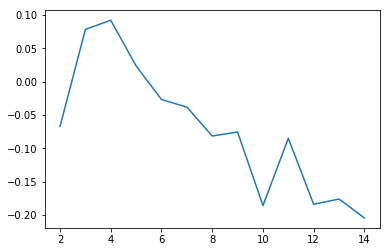

In [199]:
plt.plot(pd.DataFrame(sa_)[0], pd.DataFrame(sa_)[1]);

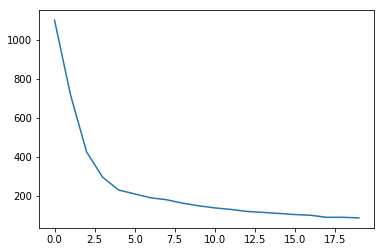

In [200]:
# sum of squared distances
sd = []
for num_clusters in list(range(1,21)):
    mod_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    mod_clus.fit(x_df)
    sd.append(mod_clus.inertia_)

plt.plot(sd)

In [201]:
# analysis of clusters formed
country_updated.index = pd.RangeIndex(len(country_updated.index))
country_km = pd.concat([country_updated, pd.Series(mod_clus.labels_)], axis=1)
country_km.columns 

cluster_km_child_mort = pd.DataFrame(country_km.groupby(["ClusterId"]).child_mort.mean())
cluster_km_exports = pd.DataFrame(country_km.groupby(["ClusterId"]).exports.mean())
cluster_km_health = pd.DataFrame(country_km.groupby(["ClusterId"]).health.mean())

cluster_km_imports = pd.DataFrame(country_km.groupby(["ClusterId"]).imports.mean())
cluster_km_income = pd.DataFrame(country_km.groupby(["ClusterId"]).income .mean())
cluster_km_inflation = pd.DataFrame(country_km.groupby(["ClusterId"]).inflation.mean())

cluster_km_life_expec= pd.DataFrame(country_km.groupby(["ClusterId"]).life_expec.mean())
cluster_km_total_fer = pd.DataFrame(country_km.groupby(["ClusterId"]).total_fer .mean())
cluster_km_gdpp = pd.DataFrame(country_km.groupby(["ClusterId"]).gdpp.mean())

In [202]:
df = pd.concat([pd.Series([0,1,2,3,4]),cluster_km_child_mort,cluster_km_exports,cluster_km_health,cluster_km_income,cluster_km_imports,cluster_km_inflation,cluster_km_life_expec,cluster_km_total_fer,cluster_km_gdpp], axis=1)
df.columns = ['ClusterId', 'child_mort','exports', 'health', 'imports' ,'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
df.head()

,ClusterId,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,64.996154,39.718846,5.152308,6411.153846,44.773077,12.226538,63.461538,4.174231,3076.423077
1,1,26.361111,26.919139,5.630556,10631.111111,32.290719,8.448778,72.627778,2.420833,5338.833333
2,2,13.583333,52.821429,7.052857,16000.952381,60.064286,4.222571,74.666667,1.910476,9633.809524
3,3,4.159091,42.018182,10.177727,39850.000000,39.268182,1.340136,80.990909,1.805455,45281.818182
4,4,110.426087,22.966087,6.975217,1550.130435,38.582609,8.628478,56.426087,5.584783,779.217391


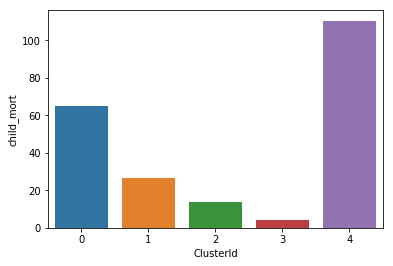

In [203]:
#plotting graphs to see 
sns.barplot(x=df.ClusterId,y=df.child_mort)

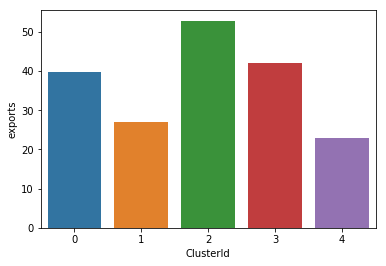

In [204]:
sns.barplot(x=df.ClusterId,y=df.exports)

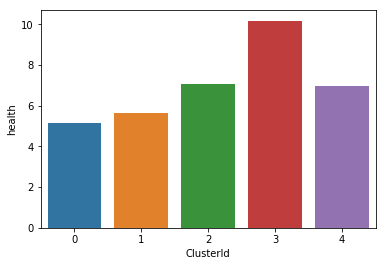

In [205]:
sns.barplot(x=df.ClusterId,y=df.health)

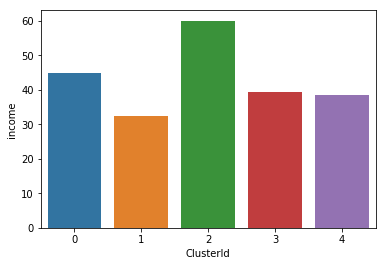

In [206]:
sns.barplot(x=df.ClusterId,y=df.income)

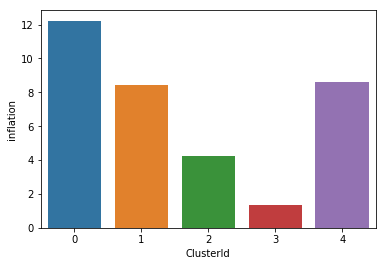

In [207]:
sns.barplot(x=df.ClusterId,y=df.inflation)

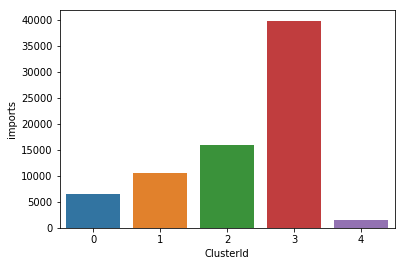

In [208]:
sns.barplot(x=df.ClusterId,y=df.imports)

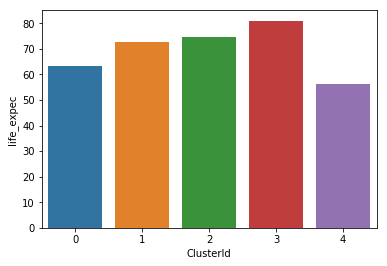

In [209]:
sns.barplot(x=df.ClusterId,y=df.life_expec)

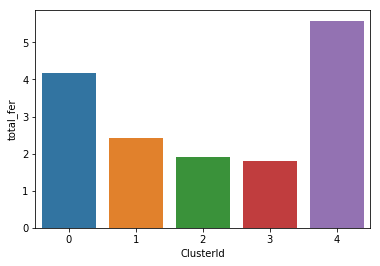

In [210]:
sns.barplot(x=df.ClusterId,y=df.total_fer)

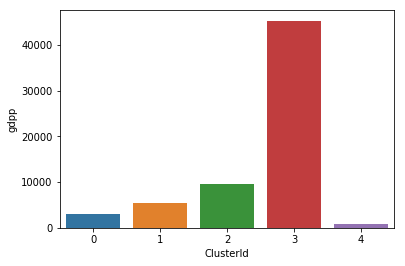

In [211]:
sns.barplot(x=df.ClusterId,y=df.gdpp)

In [259]:
country_merged.loc[country_merged['ClusterId']==4]

,ClusterId,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,4,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
17,4,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758
25,4,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
26,4,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
28,4,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310
31,4,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
32,4,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897
37,4,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
40,4,Cote d'Ivoire,111.0,50.60,5.30,43.3,2690,5.390,56.3,5.27,1220
63,4,Guinea,109.0,30.30,4.93,43.2,1190,16.100,58.0,5.34,648


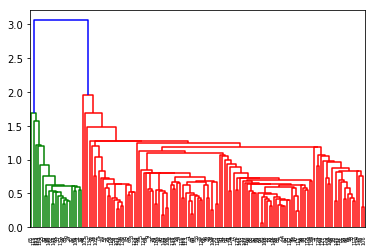

In [213]:
# heirarchical clustering -- along with K meanss as per problem statement

merging = linkage(x_df, method = "single", metric='euclidean')
dendrogram(merging)
plt.show()

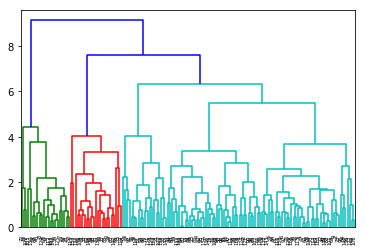

In [214]:
#Showing dendogram as per clusters formed
merging = linkage(x_df, method = "complete", metric='euclidean')
dendrogram(merging)
plt.show()

In [215]:
Cluster_Cut = pd.Series(cut_tree(merging, n_clusters = 5).reshape(-1,))
country_hc = pd.concat([country_merged, Cluster_Cut], axis=1)
country_hc.columns

Index([ 'ClusterId',    'country', 'child_mort',    'exports',     'health',
          'imports',     'income',  'inflation', 'life_expec',  'total_fer',
             'gdpp',            0],
      dtype='object')

In [216]:
#summarise the whole mean data as shown below

cluster_km_child_mort = pd.DataFrame(country_hc.groupby(["ClusterId"]).child_mort.mean())
cluster_km_exports = pd.DataFrame(country_hc.groupby(["ClusterId"]).exports.mean())
cluster_km_health = pd.DataFrame(country_hc.groupby(["ClusterId"]).health .mean())
cluster_km_imports = pd.DataFrame(country_hc.groupby(["ClusterId"]).imports.mean())
cluster_km_income= pd.DataFrame(country_hc.groupby(["ClusterId"]).income.mean())
cluster_km_inflation = pd.DataFrame(country_hc.groupby(["ClusterId"]).inflation .mean())
cluster_km_life_expec = pd.DataFrame(country_hc.groupby(["ClusterId"]).life_expec.mean())
cluster_km_total_fer= pd.DataFrame(country_hc.groupby(["ClusterId"]).total_fer.mean())
cluster_km_gdpp = pd.DataFrame(country_hc.groupby(["ClusterId"]).gdpp .mean())

In [217]:
# catcatinating newly columns with cluster means
df = pd.concat([pd.Series([0,1,2,3,4]), cluster_km_child_mort,cluster_km_exports,cluster_km_health,cluster_km_income,cluster_km_imports,cluster_km_inflation,cluster_km_life_expec,cluster_km_total_fer,cluster_km_gdpp], axis=1)
df.columns = ['ClusterId', 'child_mort','exports', 'health', 'imports' ,'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
df.head()

,ClusterId,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,64.996154,39.718846,5.152308,6411.153846,44.773077,12.226538,63.461538,4.174231,3076.423077
1,1,26.361111,26.919139,5.630556,10631.111111,32.290719,8.448778,72.627778,2.420833,5338.833333
2,2,13.583333,52.821429,7.052857,16000.952381,60.064286,4.222571,74.666667,1.910476,9633.809524
3,3,4.159091,42.018182,10.177727,39850.000000,39.268182,1.340136,80.990909,1.805455,45281.818182
4,4,110.426087,22.966087,6.975217,1550.130435,38.582609,8.628478,56.426087,5.584783,779.217391


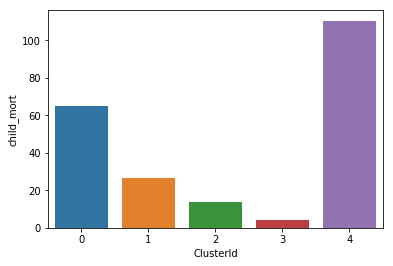

In [218]:

#plotting again
sns.barplot(x=df.ClusterId,y=df.child_mort)

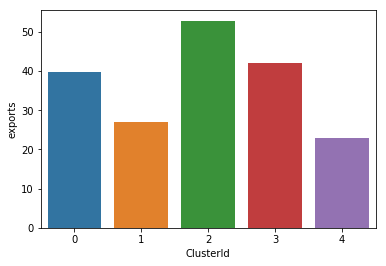

In [219]:
sns.barplot(x=df.ClusterId,y=df.exports)

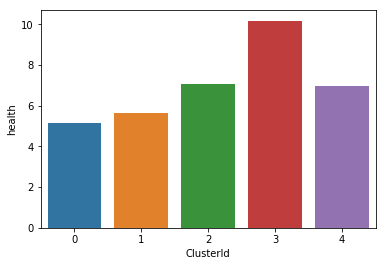

In [220]:
sns.barplot(x=df.ClusterId,y=df.health)

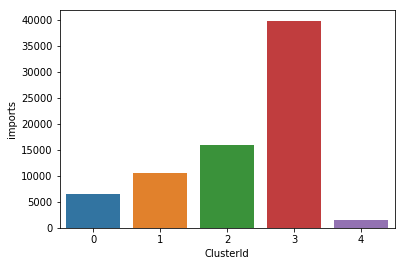

In [221]:
sns.barplot(x=df.ClusterId,y=df.imports)

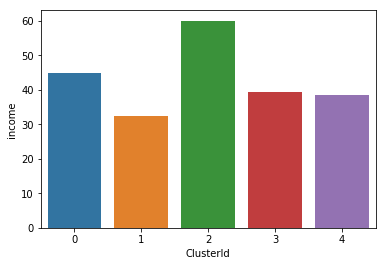

In [222]:
sns.barplot(x=df.ClusterId,y=df.income)

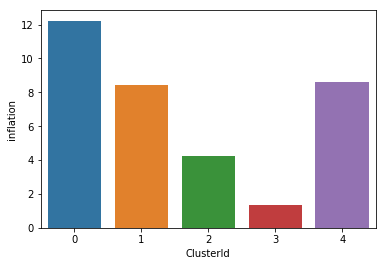

In [223]:
sns.barplot(x=df.ClusterId,y=df.inflation)

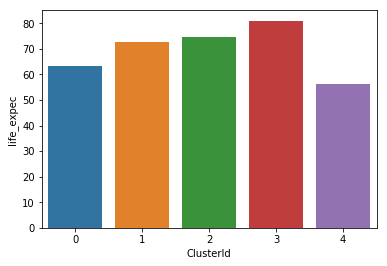

In [224]:
sns.barplot(x=df.ClusterId,y=df.life_expec)

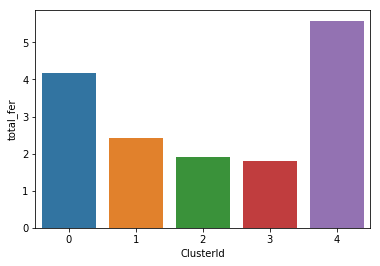

In [225]:
sns.barplot(x=df.ClusterId,y=df.total_fer)

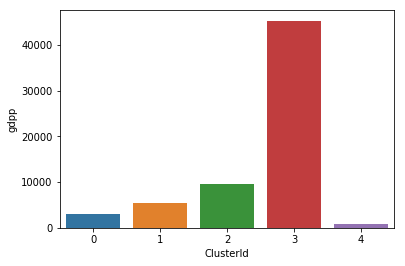

In [226]:
sns.barplot(x=df.ClusterId,y=df.gdpp)

In [242]:
required_data=country_merged.loc[country_merged['ClusterId']==4]

In [243]:
required_data.shape

(23, 11)

In [244]:
required_data.head()

,ClusterId,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,4,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
17,4,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758
25,4,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
26,4,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
28,4,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310


#### Above shown are the countries which need attention from the NGO namesly Afghanistan,Benin, Cameroon,Burkina Fasi,Burundi....
### Please note this clustering(cluster number) may change dynamically everytime we run the code.!